# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [176]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [177]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [178]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [179]:
penguins = penguins.dropna()

In [180]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [181]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

In [182]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        
    def initialize_centers(self, X):
        np.random.shuffle(X)
        return X[:self.k]
    
    def get_closest_center(self, X, centers):
        distances = np.sqrt(((X - centers[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def update_centers(self, X, labels):
        centers = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centers[i] = np.mean(X[labels==i], axis=0)
        return centers
    
    def fit(self, X):
        centers = self.initialize_centers(X)
        for i in range(self.max_iters):
            labels = self.get_closest_center(X, centers)
            new_centers = self.update_centers(X, labels)
            if np.allclose(centers, new_centers):
                break
            centers = new_centers
        self.labels_ = labels
        self.cluster_centers_ = centers
    
    def predict(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def get_wss(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        labels = self.labels_
        wss = 0
        for i in range(self.k):
            cluster_points = X[labels==i]
            cluster_distance = distances[i][labels==i]
            wss += np.sum(cluster_distance**2)
        return wss


In [183]:
kmeans = KMeans(k=5)
kmeans.fit(X)

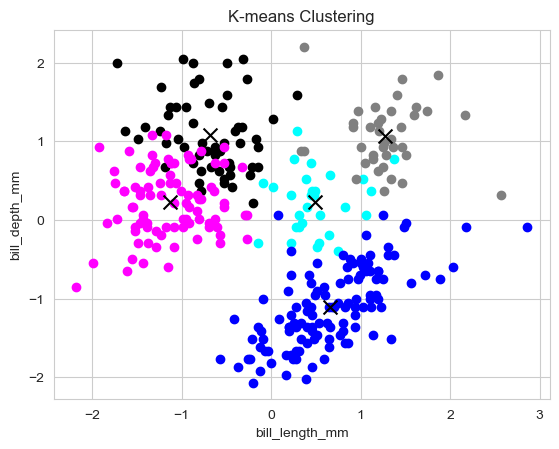

In [184]:
#Make a plot where the color is the label assigned by the clustering
import matplotlib.pyplot as plt

# Fit the K-means model with k=2
kmeans = KMeans(k=5)
kmeans.fit(X)

# Plot the cluster assignments
colors = ['Aqua', 'Black', 'Blue', 'Fuchsia', 'Gray', 'Green', 'Lime', 'Maroon', 'Navy', 'Olive', 'Purple', 'Red', 'Silver', 'Teal', 'White', 'Yellow']
for i in range(kmeans.k):
    plt.scatter(X[kmeans.labels_ == i, 0], X[kmeans.labels_ == i, 1], color=colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='k', marker='x', s=100)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('K-means Clustering')
plt.show()


[0 1 0 3 4 1 1 2 3 4 2 4 2 4 1 3 3 3 4 2 3 2 3 3 1 2 4 2 2 1 1 2 3 2 0 3 4
 1 2 3 3 1 1 3 1 3 0 3 3 2 2 1 3 2 1 2 1 0 3 3 3 3 4 2 2 3 3 0 3 4 4 2 2 3
 2 3 4 4 3 2 1 2 4 3 2 2 2 2 3 3 4 2 2 3 1 2 1 0 3 1 3 2 3 0 0 2 2 2 4 1 3
 3 2 4 2 3 2 0 2 2 3 2 2 2 3 1 1 2 4 1 4 2 1 0 3 1 2 2 3 2 2 1 2 3 1 0 1 2
 2 2 2 0 1 3 1 4 2 2 3 4 2 2 2 1 3 3 1 2 2 2 1 3 1 2 2 4 3 4 4 1 2 0 2 1 4
 2 2 4 2 2 3 2 0 2 2 1 1 3 3 3 4 0 2 3 2 2 3 1 3 2 2 2 2 1 0 0 1 3 2 0 2 1
 0 2 2 0 3 2 2 3 1 3 3 2 3 1 2 2 2 1 1 2 0 3 3 2 0 4 3 1 2 0 3 1 1 2 1 2 3
 2 1 4 3 4 2 3 3 2 3 2 2 3 0 4 4 0 2 1 4 2 4 4 2 2 2 2 3 1 3 3 2 3 1 3 2 0
 3 4 0 2 3 3 3 0 4 3 1 1 2 1 2 2 2 2 2 3 2 2 2 2 3 2 4 1 4 3 3 3 3 1 3 2 1]


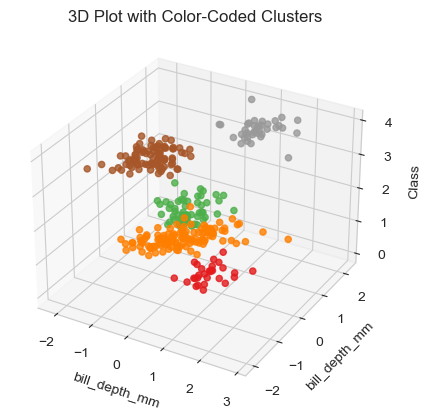

In [185]:

#Make a 3D plot where the color is the label assigned by the clustering

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(kmeans.predict(X))
# Plot data points with color-coded labels
ax.scatter(X[:, 0], X[:, 1], kmeans.predict(X), c=kmeans.predict(X), cmap='Set1', alpha=0.8)

# Add labels and title
ax.set_xlabel('bill_depth_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('Class')
ax.set_title('3D Plot with Color-Coded Clusters')

# Show plot
plt.show()

In [186]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table
nc=3

np.random.seed(2018)
kmeans = KMeans()
kmeans.fit(X)
c1=kmeans.cluster_centers_
z1 = kmeans.predict(X)

kmeans = KMeans()
kmeans.fit(X)
c2 = kmeans.cluster_centers_
z2 = kmeans.predict(X)
zs = [z1, z2]
cs = [c1, c2]
print(zs)
print(cs)

[array([0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1,
       0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1,
       0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1

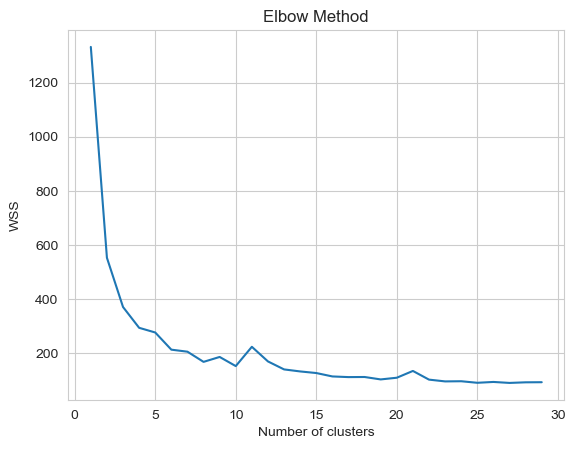

In [190]:
#TODO Do the elbow method for different k's
wss = []
for i in range(1, 30):
    kmeans = KMeans(k=i)
    kmeans.fit(X)
    a=kmeans.get_wss(X)
    wss.append(a)

# Plot the WSS values against the number of clusters
x=np.arange(1,30)
plt.plot(x, wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [ ]:
#TODO train 1000 models, with random initialization. Plot the results of the losses



In [ ]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses

We have already seen the K-Means class. We know that it can help us to reduce dimensionality and understand how the data behave. We can use it for finding groups and classify them. Now, we are going to use it to do image segmentation.  

What do you think are the data points?  
How can we evaluate each point?  
How is different an image from a normal matrix of data?  

We are going to use RGB images. They have three channels and we must take those into account while computing the groups.

<img src="three_d_array.png" alt="three_d_array" width="300"/>

This time, you will have to implement K-Means by hand, do not use the sklearn. How can you define the centroids?

In [ ]:
#Import libraries
from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests

In [ ]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
img = io.imread("image.jpg")

(-0.5, 399.5, 399.5, -0.5)

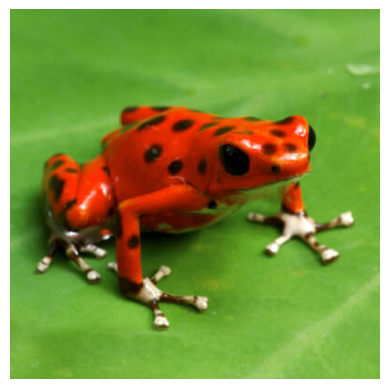

In [ ]:
#Show image
plt.imshow(img)
plt.axis("off")

In [ ]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
img.shape

(400, 400, 3)

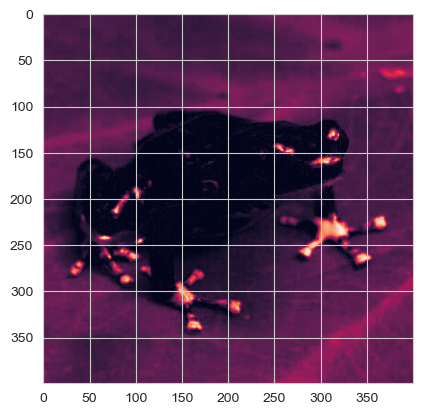

In [ ]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [ ]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for computing the new centroids. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new centroids. The data and labels do not change.
def compute_centroids(centroids,data):
    #For each centroid, calculate the new center, by finding the mean of the data points in each channel.

    return None

In [ ]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for assigning the points to a new centroid. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new labels. The points are assigned based on Euclidean distance.
def assign(centroids,data):

    return None

In [ ]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method that implements K-Means. The parameters are:
#     - k. The problem with K-Means is that it needs a hyperparameter k, selected by the user.
#     - image. 
#Returns a segmented image.
def k_means(k,image):
    #Generate the centroids. Randomly. Our centroids are three dimensional.
    centroids = {i+1:[np.random.randint(255),np.random.randint(255),np.random.randint(255)]for i in range(k)}
    
    return new_i

In [ ]:
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,9):
    images.append(k_means(k,img))

NameError: name 'new_i' is not defined

In [ ]:
#Method for showing the comparison of the images
def print_images(imagenes):
    #Configuration of the plot
    plt.figure(figsize=(15, 10))
    plt.subplot(np.ceil(len(imagenes)/3), 3, 1)

    #Show original image
    plt.imshow(img)
    plt.title("Imagen Original")
    plt.axis("off")

    #Show the segmented images
    for idx in range(len(imagenes)):
        plt.subplot(np.ceil(len(imagenes)/3), 3, 2 + idx)
        plt.imshow(imagenes[idx].astype('uint8'))
        plt.title(f"{idx+1} Colors")
        plt.axis("off")
    plt.show()

In [ ]:
print_images(images)

In [ ]:
plt.imshow(k_means(15,img))